# Week 8: Support Vector Machines



In [22]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

mat = pd.read_csv('WBC.csv')
mat.drop('Unnamed: 0', axis=1, inplace=True)
print(mat.shape)
mat.head()

(10108, 20)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,Sample
0,7.705763,0.991449,0.023529,41.733333,1.048193,43.5,5,68.713823,0.781410,0.869809,41.605769,5.0,0.999950,50.6,11,56.8,9,5,0.000000,WBC
1,296.676531,3.069244,0.515789,55.275000,3.130435,108.0,155,271.802401,0.885943,0.820493,56.551683,5.0,0.893470,76.3,8,668.3,9,25,0.037783,WBC
2,537.484884,1.001452,0.058824,42.800000,1.125000,40.5,280,75.633843,0.843340,0.835149,42.076923,5.0,0.999243,50.5,7,36.6,11,3,0.000000,WBC
3,701.235607,1.130061,0.107527,46.266667,1.240964,51.5,365,90.187681,0.705554,0.846169,47.645833,5.0,0.999204,60.4,6,62.7,7,11,0.021176,WBC
4,720.500015,0.995128,0.023256,39.875000,1.047619,44.0,375,65.618147,0.847418,0.831938,44.894231,4.5,0.989088,73.4,9,40.5,8,7,0.000000,WBC


In [2]:
sample_set = set(list(mat.Sample))
print(sample_set)
countWBC = list(mat.Sample).count('WBC')
countHL60 = list(mat.Sample).count('HL60')
countMCF7 = list(mat.Sample).count('MCF7')

print("Number of WBC: {}".format(countWBC))
print("Number of HL60: {}".format(countHL60))
print("Number of MCF7: {}".format(countMCF7))

{'HL60', 'MCF7', 'WBC'}
Number of WBC: 8629
Number of HL60: 322
Number of MCF7: 1157


In [3]:
WBC_array = []
MCF7_array = []
HL60_array = []

for index, row in mat.iterrows():
    if (row['Sample'] == 'WBC'):
        WBC_array.append([row['V1'],row['V2'],row['V3'],row['V4'],row['V5'],row['V6'],row['V7'],row['V8'],row['V9'],row['V10'],row['V11'],row['V12'],row['V13'],row['V14'],row['V15'],row['V16'],row['V17'],row['V18'],row['V19'], -1])
    elif (row['Sample'] == 'MCF7'):
        MCF7_array.append([row['V1'],row['V2'],row['V3'],row['V4'],row['V5'],row['V6'],row['V7'],row['V8'],row['V9'],row['V10'],row['V11'],row['V12'],row['V13'],row['V14'],row['V15'],row['V16'],row['V17'],row['V18'],row['V19'], 1])
    else:
        HL60_array.append([row['V1'],row['V2'],row['V3'],row['V4'],row['V5'],row['V6'],row['V7'],row['V8'],row['V9'],row['V10'],row['V11'],row['V12'],row['V13'],row['V14'],row['V15'],row['V16'],row['V17'],row['V18'],row['V19'], 1])

WBC_array = np.asarray(WBC_array).T
MCF7_array = np.asarray(MCF7_array).T
HL60_array = np.asarray(HL60_array).T

print(WBC_array.shape)
print(MCF7_array.shape)
print(HL60_array.shape)

assert((WBC_array.shape[1] + MCF7_array.shape[1] + HL60_array.shape[1]) == mat.shape[0])

(20, 8629)
(20, 1157)
(20, 322)


#### (1) Choose any two variables and plot them against cell identity (in color). Do you see clear separation of these classes? What does this tell you about whether or not you can classify the cells if differing type?

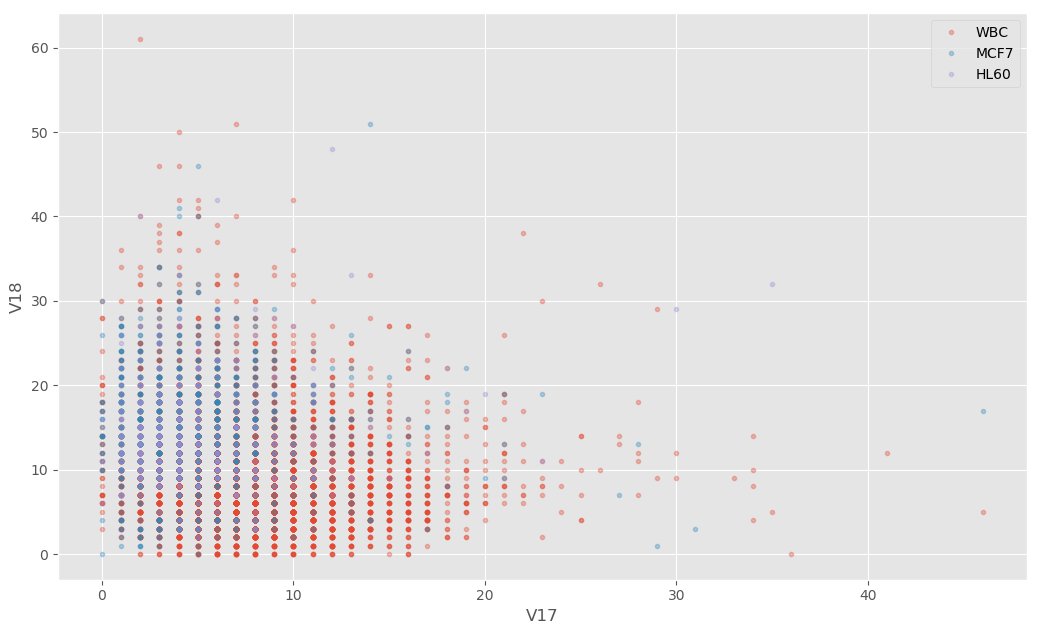

In [4]:
plt.figure(1, figsize=(12.5, 7.5), dpi=100)

plt.plot(WBC_array[16],WBC_array[17], '.', alpha=(1/3), label='WBC')
plt.plot(MCF7_array[16],MCF7_array[17], '.', alpha=(1/3), label='MCF7')
plt.plot(HL60_array[16],HL60_array[17], '.', alpha=(1/3), label='HL60')
plt.xlabel("V17")
plt.ylabel("V18")
plt.legend()

plt.show()

I plotted variable 17 against variable 18. Their colors are identified in the legend on the top right. We can see that there is not a clear separation of classes, a lot of them are overlapping. It should be hard to classify which sample a cell is according to only two variables.

#### (3) Use principal components analysis to visualize the variation in each variable. Plot the first two principal components against the cell type. Do you see better separation in this case? What does this tell you about your ability to distinguish the cell types?

In [5]:
import numpy as np
from sklearn.decomposition import PCA

X = mat.drop(['Sample'], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,7.705763,0.991449,0.023529,41.733333,1.048193,43.5,5,68.713823,0.781410,0.869809,41.605769,5.0,0.999950,50.6,11,56.8,9,5,0.000000
1,296.676531,3.069244,0.515789,55.275000,3.130435,108.0,155,271.802401,0.885943,0.820493,56.551683,5.0,0.893470,76.3,8,668.3,9,25,0.037783
2,537.484884,1.001452,0.058824,42.800000,1.125000,40.5,280,75.633843,0.843340,0.835149,42.076923,5.0,0.999243,50.5,7,36.6,11,3,0.000000
3,701.235607,1.130061,0.107527,46.266667,1.240964,51.5,365,90.187681,0.705554,0.846169,47.645833,5.0,0.999204,60.4,6,62.7,7,11,0.021176
4,720.500015,0.995128,0.023256,39.875000,1.047619,44.0,375,65.618147,0.847418,0.831938,44.894231,4.5,0.989088,73.4,9,40.5,8,7,0.000000


In [6]:
from scipy import stats

X_zscored = stats.zscore(X, axis=0)
print(X_zscored.shape)
#print(X_zscored)
#for row in range(X_zscored.shape[0]):
#    for col in range(X_zscored.shape[1]):
#        print(X_zscored[row][col])

(10108, 19)


[  3.10905748e-01   1.12991472e-01   1.04967391e-01   9.25024353e-02
   6.13078448e-02   5.32673265e-02   4.85588226e-02   4.39212535e-02
   4.23215874e-02   3.48670728e-02   3.19532639e-02   1.90344438e-02
   1.34519929e-02   1.19582149e-02   8.94741644e-03   4.52742341e-03
   3.65024410e-03   8.66046814e-04   5.90166527e-14]


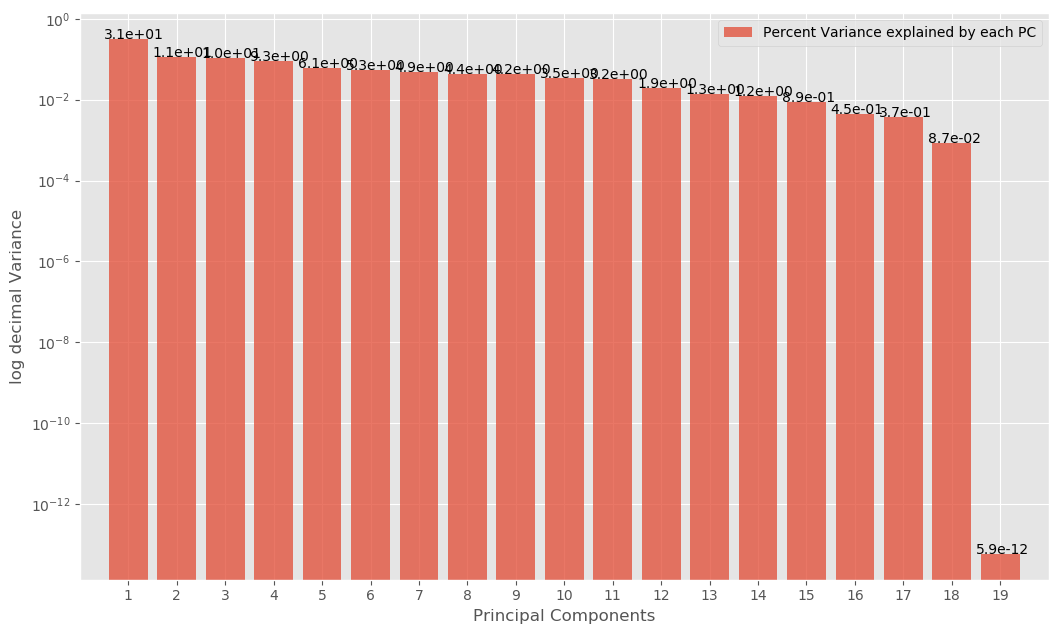

In [121]:
plt.figure(2, figsize=(12.5, 7.5), dpi=100)

pca = PCA(n_components=19)    
transformPCA = pca.fit_transform(X_zscored)
print(pca.explained_variance_ratio_)

plt.bar(np.arange(1,20), pca.explained_variance_ratio_, alpha=0.75, label='Percent Variance explained by each PC')
for i,j in zip(np.arange(1,20),pca.explained_variance_ratio_):
    plt.annotate(str('{:.1e}'.format(float(100*j))),xy=(i-0.5,j))
plt.xticks(np.arange(1,20))
plt.yscale('log')
plt.xlabel('Principal Components')
plt.ylabel('log decimal Variance')
plt.xlim(0,20)
plt.legend()
plt.show()

(8629,)
(322,)
(1157,)


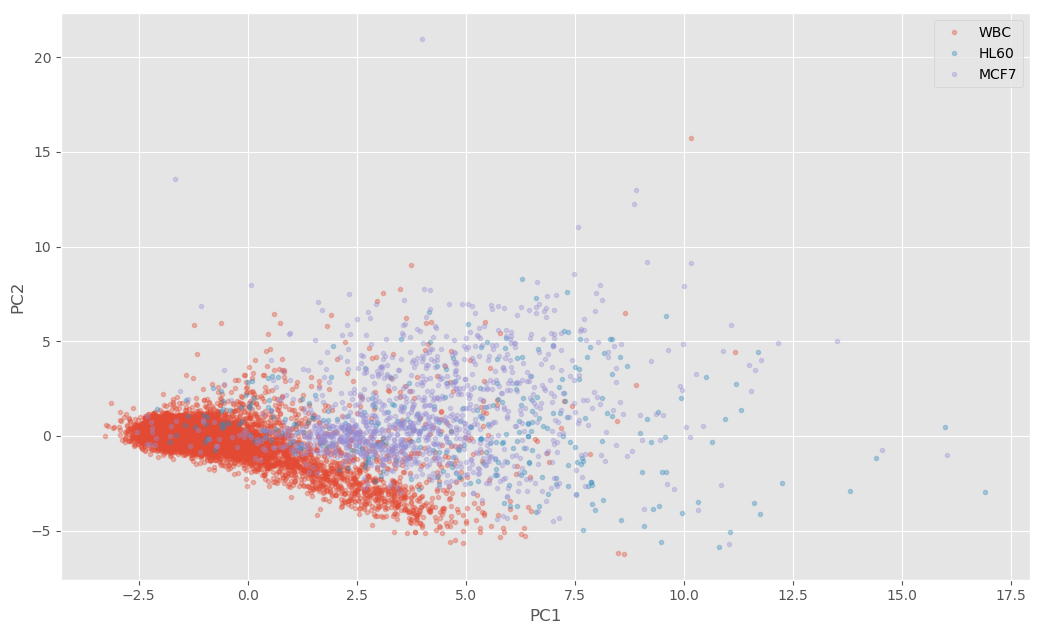

In [122]:
plt.figure(3, figsize=(12.5, 7.5), dpi=100)
print(transformPCA.T[0][0:countWBC].shape)
print(transformPCA.T[0][countWBC:countWBC+countHL60].shape)
print(transformPCA.T[0][countWBC+countHL60:countWBC+countHL60+countMCF7].shape)
assert(transformPCA.T[0][0:countWBC+countHL60+countMCF7].shape[0] == mat.shape[0])


plt.plot(transformPCA.T[0][0:countWBC], transformPCA.T[1][0:countWBC], '.', alpha=(1/3), label='WBC')
plt.plot(transformPCA.T[0][countWBC:countWBC+countHL60], transformPCA.T[1][countWBC:countWBC+countHL60], '.', alpha=(1/3), label='HL60')
plt.plot(transformPCA.T[0][countWBC+countHL60:countWBC+countHL60+countMCF7], transformPCA.T[1][countWBC+countHL60:countWBC+countHL60+countMCF7], '.', alpha=(1/3), label='MCF7')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.show()

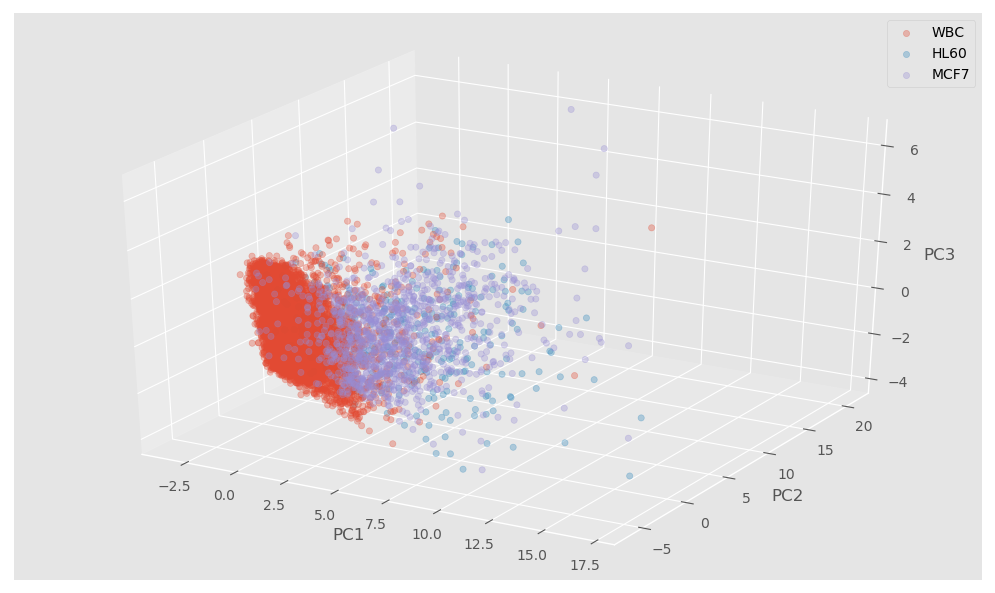

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(3, figsize=(12.5, 7.5), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=transformPCA.T[0][0:countWBC], ys=transformPCA.T[1][0:countWBC], zs=transformPCA.T[2][0:countWBC], 
           zdir='z', s=20, c=None, depthshade=True, alpha=(1/3), label='WBC')
ax.scatter(xs=transformPCA.T[0][countWBC:countWBC+countHL60], ys=transformPCA.T[1][countWBC:countWBC+countHL60], zs=transformPCA.T[2][countWBC:countWBC+countHL60], 
           zdir='z', s=20, c=None, depthshade=True, alpha=(1/3), label='HL60')
ax.scatter(xs=transformPCA.T[0][countWBC+countHL60:countWBC+countHL60+countMCF7], ys=transformPCA.T[1][countWBC+countHL60:countWBC+countHL60+countMCF7], zs=transformPCA.T[2][countWBC+countHL60:countWBC+countHL60+countMCF7], 
           zdir='z', s=20, c=None, depthshade=True, alpha=(1/3), label='MCF7')
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

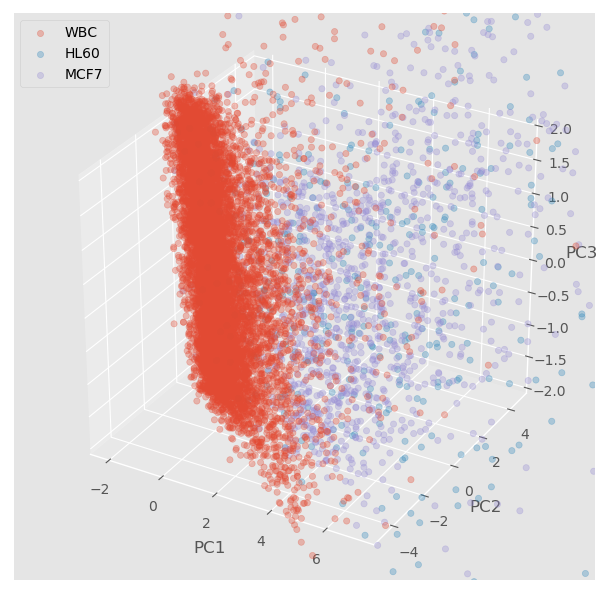

In [10]:
fig = plt.figure(3, figsize=(7.5, 7.5), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=transformPCA.T[0][0:countWBC], ys=transformPCA.T[1][0:countWBC], zs=transformPCA.T[2][0:countWBC], 
           zdir='z', s=20, c=None, depthshade=True, alpha=(1/3), label='WBC')
ax.scatter(xs=transformPCA.T[0][countWBC:countWBC+countHL60], ys=transformPCA.T[1][countWBC:countWBC+countHL60], zs=transformPCA.T[2][countWBC:countWBC+countHL60], 
           zdir='z', s=20, c=None, depthshade=True, alpha=(1/3), label='HL60')
ax.scatter(xs=transformPCA.T[0][countWBC+countHL60:countWBC+countHL60+countMCF7], ys=transformPCA.T[1][countWBC+countHL60:countWBC+countHL60+countMCF7], zs=transformPCA.T[2][countWBC+countHL60:countWBC+countHL60+countMCF7], 
           zdir='z', s=20, c=None, depthshade=True, alpha=(1/3), label='MCF7')
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_xlim(-2.5, 7.5)
ax.set_ylim(-5, 5)
ax.set_zlim(-2, 2)

plt.show()

There is a better separation in this case. This tells us that it shouldn't be impossible to separate the cells just by using these 19 variables. What is interesting though, is the amount of cells near the separation from all three groups.

#### (4) How does partial least squares fare in desciminating cancer and non-cancer cells (make cancer=1 and non-cancer=0; this is called PLS-DA)? How does this relate to the results in the previous questions?

In [11]:
import scipy
from scipy import stats
print(X_zscored.shape)


Y = np.concatenate((WBC_array.T,HL60_array.T,MCF7_array.T))[:,-1]
Y_zscored = np.reshape(scipy.stats.zscore(Y), newshape=(10108,1))
print(Y_zscored.shape)
print(Y)
print(Y_zscored)

(10108, 19)
(10108, 1)
[-1. -1. -1. ...,  1.  1.  1.]
[[-0.41400335]
 [-0.41400335]
 [-0.41400335]
 ..., 
 [ 2.41543941]
 [ 2.41543941]
 [ 2.41543941]]


In [12]:
def one_minus_ratio(A_model, A_observed):
    # np.subtract ~ element-wise subtraction 
    # np.square ~ element-wise squaring
    # np.sum ~ sum of all elements
    
    sum_of_squared_differences = np.sum(np.square(np.subtract(A_model, A_observed)))
    squared_observed = np.sum(np.square(A_observed))
    
    #print("Results for one_minus_ratio function:")
    #print("observed shape: {}".format(A_observed.shape))
    #print("model shape: {}\n".format(A_model.shape))
    
    return(1-(sum_of_squared_differences/squared_observed))

# tests for function: one_minus_ratio
assert(one_minus_ratio(X_zscored,X_zscored)==1)
assert(one_minus_ratio(Y_zscored,Y_zscored)==1)

def R_2(A_scores, A_loadings, A_observed):
    # creates A_model for input into one_minus_ratio function
    A_model = np.matmul(A_scores,A_loadings.T)
    #print(A_model.shape)
    #print("Results for R_2 function:")
    #print("observed shape: {}".format(A_observed.shape))
    #print("scores shape: {}".format(A_scores.shape))
    #print("loadings shape: {}".format(A_loadings.shape))
    #print("model shape: {}\n".format(A_model.shape))
    
    return(one_minus_ratio(A_model, A_observed))

90.29% of the variance in X has been explained at 13 principal components.


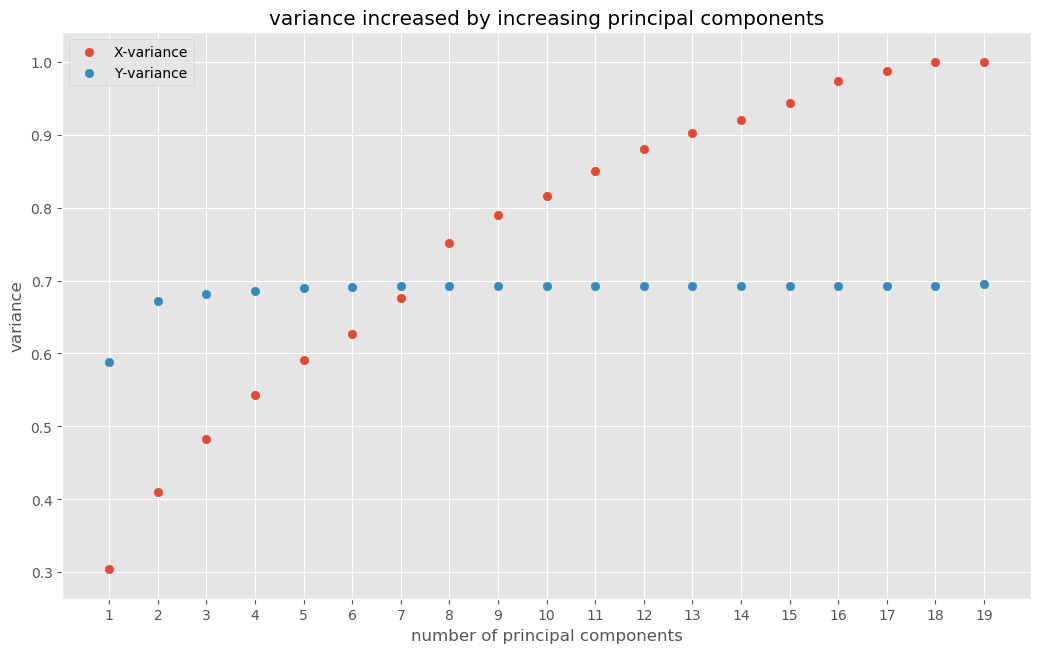

In [13]:
from sklearn.cross_decomposition import PLSRegression

R_2_X_holder_using_function_I_wrote= [] # holds R_squared values for variance in X defined by function I wrote
R_2_Y_holder_lazy = [] # holds R_squared values for variance in Y given by PLSR
#R_2_Y_holder_using_function_I_wrote = [] # holds R_squared values for variance in Y defined by function I wrote

dummy_countx = True
dummy_county = True

max_number_of_pc = 19

for i in range(max_number_of_pc):
    #print("{} principal components.".format(i+1))
    pls= PLSRegression(n_components=(i+1), max_iter=500)
    pls.fit(X_zscored,Y_zscored)
        
    R_2_X_holder_using_function_I_wrote.append(R_2(pls.x_scores_, pls.x_loadings_, X_zscored))
    
    #print(R_2_X_holder_using_function_I_wrote[-1])
    
    if R_2_X_holder_using_function_I_wrote[-1] >= 0.9 and dummy_countx:
        print("{}% of the variance in X has been explained at {} principal components.".format((round(100*R_2_X_holder_using_function_I_wrote[-1], 2)), (i+1)))
        dummy_countx = False
    
    
    Y_model = (pls.predict(X_zscored))
    R_2_Y_holder_lazy.append(one_minus_ratio(Y_model, Y_zscored))
    
    #print(R_2_Y_holder_lazy[-1])
    #print(pls.score(X=X_zscored, y=Y_zscored))
    
    if R_2_Y_holder_lazy[-1] >= 0.9 and dummy_county:
        print("{}% of the variance in Y has been explained at {} principal components.".format((round(100*R_2_Y_holder_lazy[-1], 2)), (i+1)))
        dummy_county = False
        
    #R_2_Y_holder_using_function_I_wrote.append(R_2(pls.y_scores_, pls.y_loadings_, Y_zscored))
    #if R_2_Y_holder_using_function_I_wrote[-1] >= 0.9:
    #    print("{}% of the variance in Y has been explained at {} principal components.".format((round(100*R_2_Y_holder_using_function_I_wrote[-1], 2)), (i+1)))

    
plt.figure(1, figsize=(12.5, 7.5), dpi=100)

plt.title("variance increased by increasing principal components")
plt.scatter(np.arange(1,max_number_of_pc+1), R_2_X_holder_using_function_I_wrote, label="X-variance")
plt.scatter(np.arange(1,max_number_of_pc+1), R_2_Y_holder_lazy, label="Y-variance")
plt.xlabel("number of principal components")
plt.ylabel("variance")
plt.xticks(np.arange(1, max_number_of_pc+1, 1.0))
plt.legend()

#plt.subplot(313)
#plt.scatter(np.arange(1,max_number_of_pc+1), R_2_Y_holder_using_function_I_wrote, label="Y-variance")
#plt.xlabel("number of principal components")
#plt.legend()

plt.show()

I will choose 14 components.

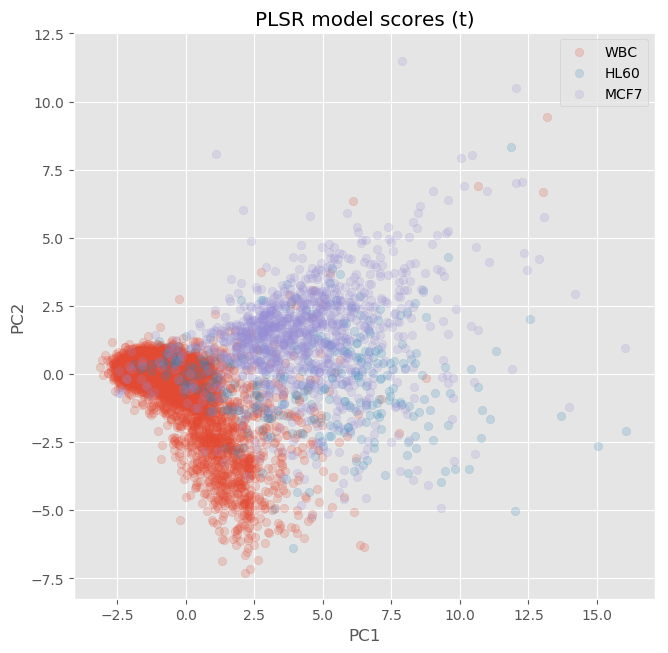

In [124]:
pls14 = PLSRegression(n_components=(14), max_iter=500)
pls14.fit(X_zscored,Y_zscored)

x_scores_pc1_values = pls14.x_scores_[:, 0] # t
x_scores_pc2_values = pls14.x_scores_[:, 1]

#y_scores_pc1_values = pls4.y_scores_[:, 0] u
#y_scores_pc2_values = pls4.y_scores_[:, 1]

plt.figure(2, figsize=(7.5, 7.5), dpi=100)


plt.scatter(x_scores_pc1_values[0:countWBC], x_scores_pc2_values[0:countWBC], alpha=0.2, label="WBC")
plt.scatter(x_scores_pc1_values[countWBC:countWBC+countHL60], x_scores_pc2_values[countWBC:countWBC+countHL60], alpha=0.2, label="HL60")
plt.scatter(x_scores_pc1_values[countWBC+countHL60:countWBC+countHL60+countMCF7], x_scores_pc2_values[countWBC+countHL60:countWBC+countHL60+countMCF7], alpha=0.2, label="MCF7")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PLSR model scores (t)")  
plt.legend()
plt.show()

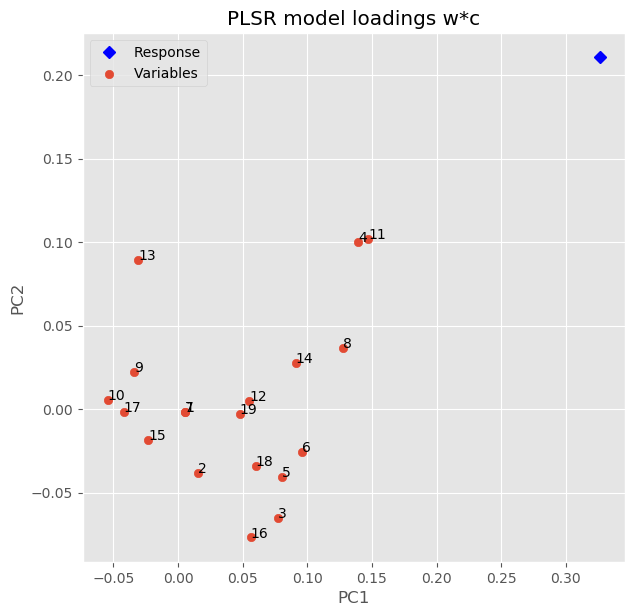

In [131]:
x_loadings_pc1_values = pls14.x_loadings_[:, 0] # p
x_loadings_pc2_values = pls14.x_loadings_[:, 1] 

y_loadings_pc1_values = pls14.y_loadings_[:, 0] # q
y_loadings_pc2_values = pls14.y_loadings_[:, 1] 

x_weights_pc1_values  = pls14.x_weights_[:,0] # w
x_weights_pc2_values  = pls14.x_weights_[:,1]

w_star =(np.matmul(pls14.x_weights_, np.linalg.inv(np.matmul(pls14.x_loadings_.T, pls14.x_weights_))))

x_weight_star_pc1_values  = w_star[:,0] # w*
x_weight_star_pc2_values  = w_star[:,1]

x_rotations_pc1_values  = pls14.x_rotations_[:,0]
x_rotations_pc2_values  = pls14.x_rotations_[:,1]

y_weights_pc1_values  = pls14.y_weights_[:,0] # c
y_weights_pc2_values  = pls14.y_weights_[:,1]

plt.figure(3, figsize=(7, 7), dpi=100)

# w*c vs. w*c
plt.plot(y_loadings_pc1_values,y_loadings_pc2_values, 'bD', label = "Response") 
plt.scatter(np.multiply(x_weight_star_pc1_values, y_weights_pc1_values), np.multiply(x_weight_star_pc2_values, y_weights_pc2_values), label="Variables")
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
for i, txt in enumerate(labels):
    plt.annotate(txt, xy=(np.multiply(x_weight_star_pc1_values, y_weights_pc1_values)[i],np.multiply(x_weight_star_pc2_values, y_weights_pc2_values)[i]),
                 xytext=(np.multiply(x_weight_star_pc1_values, y_weights_pc1_values)[i],np.multiply(x_weight_star_pc2_values, y_weights_pc2_values)[i]))
plt.legend()
plt.title("PLSR model loadings w*c")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

We can see from the scores plot that not much is different when reducing down to only two principal components. We also see that it takes 13 out of 19 components to reach atleast 90% variance in the feature matrix, which is not that good. What is more clear is the separation between the two classes, instead of types of cells, is now more clear. Though the covariance between the cells and the cancer response is not that high, it is still enough to create an almost clear distinction.

#### (5) Setup a support vector machine classifier (with linear kernel) to distinguish cancer and non-cancer.

Evaluate how well this performs (hint: think carefully about how you evaluate the model).

#### Some notes:

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable. - Marc Shivers from CrossValidated

In [14]:
Cparams = np.logspace(start=-10, stop=10, num=6)
print(Cparams)
max_iterparams = np.logspace(start=1, stop=5, num=10)
print(max_iterparams)
duality = [False, True]

from sklearn.svm import LinearSVC
primal_holder = []
dual_holder = []
for dualityBool in duality:
    accOverMax_Iter_holder = []
    for max_iter in max_iterparams:
        accuracy_holder = []
        for C in Cparams:
            svmmodel = LinearSVC(dual=dualityBool, C=C, fit_intercept=True, intercept_scaling=1, verbose=1, max_iter=max_iter)
            svmmodel.fit(X_zscored, Y)
            accuracy = svmmodel.score(X_zscored, Y)
            accuracy_holder.append(accuracy)
        accOverMax_Iter_holder.append(accuracy_holder)
    if dualityBool:
        primal_holder.append(accOverMax_Iter_holder)
    else:
        dual_holder.append(accOverMax_Iter_holder)

[  1.00000000e-10   1.00000000e-06   1.00000000e-02   1.00000000e+02
   1.00000000e+06   1.00000000e+10]
[  1.00000000e+01   2.78255940e+01   7.74263683e+01   2.15443469e+02
   5.99484250e+02   1.66810054e+03   4.64158883e+03   1.29154967e+04
   3.59381366e+04   1.00000000e+05]
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\Users\Shak3\Anaconda3\lib\site-packages\sklearn\svm\base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [15]:
plprimal_holder = (np.squeeze(np.asarray(primal_holder)))
pldual_holder = (np.squeeze(np.asarray(dual_holder)))

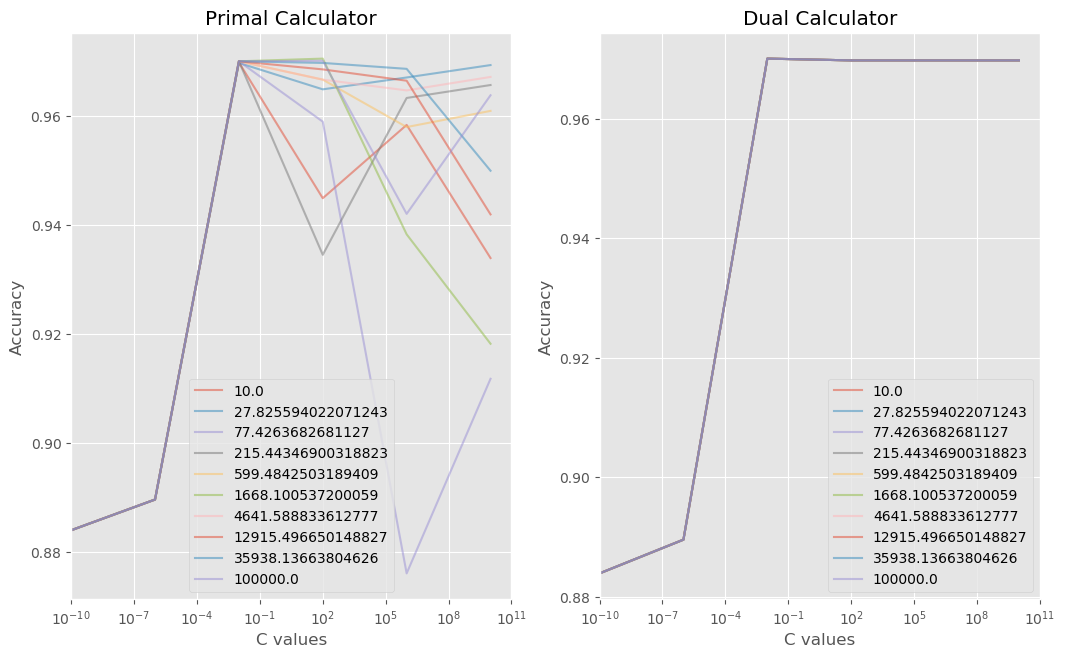

In [137]:
plt.figure(1, figsize=(12.5, 7.5), dpi=100)
plt.subplot(121)
plt.plot(Cparams, plprimal_holder[0], alpha=0.5, label='{}'.format(max_iterparams[0]))
plt.plot(Cparams, plprimal_holder[1], alpha=0.5, label='{}'.format(max_iterparams[1]))
plt.plot(Cparams, plprimal_holder[2], alpha=0.5, label='{}'.format(max_iterparams[2]))
plt.plot(Cparams, plprimal_holder[3], alpha=0.5, label='{}'.format(max_iterparams[3]))
plt.plot(Cparams, plprimal_holder[4], alpha=0.5, label='{}'.format(max_iterparams[4]))
plt.plot(Cparams, plprimal_holder[5], alpha=0.5, label='{}'.format(max_iterparams[5]))
plt.plot(Cparams, plprimal_holder[6], alpha=0.5, label='{}'.format(max_iterparams[6]))
plt.plot(Cparams, plprimal_holder[7], alpha=0.5, label='{}'.format(max_iterparams[7]))
plt.plot(Cparams, plprimal_holder[8], alpha=0.5, label='{}'.format(max_iterparams[8]))
plt.plot(Cparams, plprimal_holder[9], alpha=0.5, label='{}'.format(max_iterparams[9]))
plt.title('Primal Calculator')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.legend()
plt.xscale('log')
plt.xlim(Cparams[0], 10*Cparams[-1])
plt.subplot(122)
plt.plot(Cparams, pldual_holder[0], alpha=0.5, label='{}'.format(max_iterparams[0]))
plt.plot(Cparams, pldual_holder[1], alpha=0.5, label='{}'.format(max_iterparams[1]))
plt.plot(Cparams, pldual_holder[2], alpha=0.5, label='{}'.format(max_iterparams[2]))
plt.plot(Cparams, pldual_holder[3], alpha=0.5, label='{}'.format(max_iterparams[3]))
plt.plot(Cparams, pldual_holder[4], alpha=0.5, label='{}'.format(max_iterparams[4]))
plt.plot(Cparams, pldual_holder[5], alpha=0.5, label='{}'.format(max_iterparams[5]))
plt.plot(Cparams, pldual_holder[6], alpha=0.5, label='{}'.format(max_iterparams[6]))
plt.plot(Cparams, pldual_holder[7], alpha=0.5, label='{}'.format(max_iterparams[7]))
plt.plot(Cparams, pldual_holder[8], alpha=0.5, label='{}'.format(max_iterparams[8]))
plt.plot(Cparams, pldual_holder[9], alpha=0.5, label='{}'.format(max_iterparams[9]))
plt.xlim(Cparams[0], 10*Cparams[-1])
plt.title('Dual Calculator')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.legend()

plt.xscale('log')

Model performance over number of max iterations. I was checking to see if adjusting the number of max iterations would adjust accuracy. This was before I knew about scaling the data.

#### (6) Choose and justify your selection of a different kernel to use in SVM classification. (Hint: It should be a kernel with varying complexity, such as polynomial or RBF.)

I will choose a polynomial kernel and vary the r parameter, the constant added to the dot product, the degree of the polynomial, and like before the C parameter. The PCA scores and the PLSR scores seem to show, though in two dimensions, not in the multidimensional space that our points actually live on, that a hyperplane of varying polynomial complexity should be capable of defining a margin.

#### (7) Vary the complexity of your kernel and evaluate the ability of it to descriminate data both directly and on crossvalidation.

How does the answer of which classification strategy vary based on whether you are performing cross-validation?

In [38]:
from sklearn.preprocessing import scale

print(X_zscored.shape)

X_zscoredsc = scale(X_zscored, axis=0)

print(X_zscoredsc.shape)

for row in range(X_zscoredsc.shape[0]):
    for col in range(X_zscoredsc.shape[1]):
        #print(X_zscoredsc[row][col])
        #print(X_zscored[row][col])
        assert(int(X_zscoredsc[row][col]) == int(X_zscored[row][col]))

(10108, 19)
(10108, 19)


In [41]:
from sklearn.svm import SVC

Cadjustparams = np.logspace(-1, 2, 4)
rparams = np.linspace(0, 3, 4)
degparams = np.linspace(2,5, 4)

bigolholder = []

for C in Cadjustparams:
    for r in rparams:
        for deg in degparams:
            print("C: {}, r: {}, degree: {}".format(C,r,deg))
            SVMModel = SVC(C=C, kernel='poly', degree=deg, coef0=r)
            SVMModel.fit(X_zscored, Y) 
            accuracy = SVMModel.score(X_zscored, Y)
            print(accuracy)
            bigolholder.append([C,r,deg,accuracy])

C: 0.1, r: 0.0, degree: 2.0
0.961515631183
C: 0.1, r: 0.0, degree: 3.0
0.970815195884
C: 0.1, r: 0.0, degree: 4.0
0.967847249703
C: 0.1, r: 0.0, degree: 5.0
0.968935496636
C: 0.1, r: 1.0, degree: 2.0
0.974970320538
C: 0.1, r: 1.0, degree: 3.0
0.980312623664
C: 0.1, r: 1.0, degree: 4.0
0.985061337554
C: 0.1, r: 1.0, degree: 5.0
0.987831420657
C: 0.1, r: 2.0, degree: 2.0
0.975464978235
C: 0.1, r: 2.0, degree: 3.0
0.981499802137
C: 0.1, r: 2.0, degree: 4.0
0.986248516027
C: 0.1, r: 2.0, degree: 5.0
0.990007914523
C: 0.1, r: 3.0, degree: 2.0
0.975069252078
C: 0.1, r: 3.0, degree: 3.0
0.981895528294
C: 0.1, r: 3.0, degree: 4.0
0.987534626039
C: 0.1, r: 3.0, degree: 5.0
0.991491887614
C: 1.0, r: 0.0, degree: 2.0
0.968242975861
C: 1.0, r: 0.0, degree: 3.0
0.98100514444
C: 1.0, r: 0.0, degree: 4.0
0.980807281361
C: 1.0, r: 0.0, degree: 5.0
0.981994459834
C: 1.0, r: 1.0, degree: 2.0
0.978136129798
C: 1.0, r: 1.0, degree: 3.0
0.985852789869
C: 1.0, r: 1.0, degree: 4.0
0.989810051444
C: 1.0, r: 1

In [132]:
bigolholder = np.asarray(bigolholder)
#print(bigolholder)
accuracynotcv = list(bigolholder[:,-1])
best_performer_ind_notcv = (accuracynotcv.index(max(accuracynotcv)))
worst_performer_ind_notcv = (accuracynotcv.index(min(accuracynotcv)))

print(best_performer_ind_notcv)
print(bigolholder[best_performer_ind_notcv])
print(bigolholder[worst_performer_ind_notcv])

63
[ 100.            3.            5.            0.99990107]
[ 0.1         0.          2.          0.96151563]


In [58]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=7, shuffle=True)
skf.get_n_splits(X_zscored, Y)
print(skf)  

bigolholdercrossval = [] 
for C in Cadjustparams:
    for r in rparams:
        for deg in degparams:
            interacc = []
            for train_index, test_index in skf.split(X_zscored, Y):
                X_train, X_test = X_zscored[train_index], X_zscored[test_index]
                y_train, y_test = Y[train_index], Y[test_index]
                print("C: {}, r: {}, degree: {}".format(C,r,deg))
                SVMModel = SVC(C=C, kernel='poly', degree=deg, coef0=r)
                SVMModel.fit(X_train, y_train) 
                accuracy = SVMModel.score(X_test, y_test)
                print(accuracy)
                interacc.append(accuracy)
            bigolholdercrossval.append([C,r,deg,(np.mean(interacc)-np.std(interacc)),(np.mean(interacc)),(np.mean(interacc)+np.std(interacc))])

StratifiedKFold(n_splits=7, random_state=None, shuffle=True)
C: 0.1, r: 0.0, degree: 2.0
0.967474048443
C: 0.1, r: 0.0, degree: 2.0
0.96401384083
C: 0.1, r: 0.0, degree: 2.0
0.946675900277
C: 0.1, r: 0.0, degree: 2.0
0.94944598338
C: 0.1, r: 0.0, degree: 2.0
0.961911357341
C: 0.1, r: 0.0, degree: 2.0
0.954261954262
C: 0.1, r: 0.0, degree: 2.0
0.957033957034
C: 0.1, r: 0.0, degree: 3.0
0.973010380623
C: 0.1, r: 0.0, degree: 3.0
0.962629757785
C: 0.1, r: 0.0, degree: 3.0
0.957756232687
C: 0.1, r: 0.0, degree: 3.0
0.958448753463
C: 0.1, r: 0.0, degree: 3.0
0.962603878116
C: 0.1, r: 0.0, degree: 3.0
0.962577962578
C: 0.1, r: 0.0, degree: 3.0
0.967428967429
C: 0.1, r: 0.0, degree: 4.0
0.950865051903
C: 0.1, r: 0.0, degree: 4.0
0.957093425606
C: 0.1, r: 0.0, degree: 4.0
0.954986149584
C: 0.1, r: 0.0, degree: 4.0
0.946675900277
C: 0.1, r: 0.0, degree: 4.0
0.954986149584
C: 0.1, r: 0.0, degree: 4.0
0.959805959806
C: 0.1, r: 0.0, degree: 4.0
0.962577962578
C: 0.1, r: 0.0, degree: 5.0
0.95432525

0.973010380623
C: 1.0, r: 2.0, degree: 5.0
0.96401384083
C: 1.0, r: 2.0, degree: 5.0
0.963988919668
C: 1.0, r: 2.0, degree: 5.0
0.957756232687
C: 1.0, r: 2.0, degree: 5.0
0.963988919668
C: 1.0, r: 2.0, degree: 5.0
0.959112959113
C: 1.0, r: 2.0, degree: 5.0
0.963963963964
C: 1.0, r: 3.0, degree: 2.0
0.970934256055
C: 1.0, r: 3.0, degree: 2.0
0.97508650519
C: 1.0, r: 3.0, degree: 2.0
0.976454293629
C: 1.0, r: 3.0, degree: 2.0
0.979224376731
C: 1.0, r: 3.0, degree: 2.0
0.966066481994
C: 1.0, r: 3.0, degree: 2.0
0.968121968122
C: 1.0, r: 3.0, degree: 2.0
0.969507969508
C: 1.0, r: 3.0, degree: 3.0
0.970242214533
C: 1.0, r: 3.0, degree: 3.0
0.97508650519
C: 1.0, r: 3.0, degree: 3.0
0.965373961219
C: 1.0, r: 3.0, degree: 3.0
0.979916897507
C: 1.0, r: 3.0, degree: 3.0
0.970221606648
C: 1.0, r: 3.0, degree: 3.0
0.968121968122
C: 1.0, r: 3.0, degree: 3.0
0.96534996535
C: 1.0, r: 3.0, degree: 4.0
0.96124567474
C: 1.0, r: 3.0, degree: 4.0
0.968166089965
C: 1.0, r: 3.0, degree: 4.0
0.968144044321
C

0.960498960499
C: 100.0, r: 1.0, degree: 3.0
0.964656964657
C: 100.0, r: 1.0, degree: 4.0
0.96124567474
C: 100.0, r: 1.0, degree: 4.0
0.960553633218
C: 100.0, r: 1.0, degree: 4.0
0.957063711911
C: 100.0, r: 1.0, degree: 4.0
0.954293628809
C: 100.0, r: 1.0, degree: 4.0
0.964681440443
C: 100.0, r: 1.0, degree: 4.0
0.963963963964
C: 100.0, r: 1.0, degree: 4.0
0.95841995842
C: 100.0, r: 1.0, degree: 5.0
0.964705882353
C: 100.0, r: 1.0, degree: 5.0
0.958477508651
C: 100.0, r: 1.0, degree: 5.0
0.957063711911
C: 100.0, r: 1.0, degree: 5.0
0.961218836565
C: 100.0, r: 1.0, degree: 5.0
0.950138504155
C: 100.0, r: 1.0, degree: 5.0
0.961884961885
C: 100.0, r: 1.0, degree: 5.0
0.955647955648
C: 100.0, r: 2.0, degree: 2.0
0.970242214533
C: 100.0, r: 2.0, degree: 2.0
0.96678200692
C: 100.0, r: 2.0, degree: 2.0
0.967451523546
C: 100.0, r: 2.0, degree: 2.0
0.972991689751
C: 100.0, r: 2.0, degree: 2.0
0.967451523546
C: 100.0, r: 2.0, degree: 2.0
0.97227997228
C: 100.0, r: 2.0, degree: 2.0
0.970200970201

In [65]:
bigolholdercrossval = np.asarray(bigolholdercrossval)
#print(bigolholdercrossval.shape)
meanaccuracyyescv = list(bigolholdercrossval[:,4])
best_performer_ind_yescv = (meanaccuracyyescv.index(max(meanaccuracyyescv)))
worst_performer_ind_yescv = (meanaccuracyyescv.index(min(meanaccuracyyescv)))
#print(best_performer_ind_yescv)
print(bigolholdercrossval[best_performer_ind_yescv])
print(bigolholdercrossval[worst_performer_ind_yescv])

[ 0.1         3.          2.          0.96963837  0.97299155  0.97634472]
[ 100.            3.            5.            0.94965722    0.95300682
    0.95635642]


On direct data training, the most complex model does the best. In this case, the max value of each parameter, C=100, degree=5, and r=3 was able to achieve 0.9999 accuracy. This is clearly an example of overfitting. In cross-validation, this was not the case, the best performing model had relatively medial level parameters, C=0.1, deg=2, and r=3. A degree of 2 has been shown to be enough to achieve state of the art results in handwritten digit recognition and this problem, which may or may not be as complex as such a problem, also does well with a degree of 2. More interestingly, the worst performing model was the model that performed the best by fitting on the data directly, the model with the most complex parameters. This validates the fact that model complexity increases prediction error, but decreases training error.

#### (8) Your experimental collaborator asks you to determine whether she can collect a fewer number of measurements (cells) and still obtain the same classification efficiency when building a new estimator. How might you determine this? Can she?

In [110]:
from sklearn.utils import resample

nnsampleiter = np.logspace(0.3,4, num=50)
nnsampleiter = np.append(nnsampleiter, X.shape[0])
nsubinteracc=[]
nxsubaxis = []
for i in range(nnsampleiter.shape[0]):
    yrcheck = np.subtract(np.zeros((int(round(nnsampleiter[i])))), 1)
    Xr, yr = resample(X, Y, replace=False, n_samples=int(round(nnsampleiter[i])))
    exitvar = True
    for j in range(yrcheck.shape[0]):
        if yr[j] != yrcheck[j]:
            exitvar=False 
    if exitvar:
        i-=1 # not like c++, should have used a while loop
    else:
        X_zscoredr = stats.zscore(Xr, axis=0)
        SVMModel = SVC(C=0.1, kernel='poly', degree=2, coef0=3)
        otSVMmodel = SVC(C=100, kernel='poly', degree=5, coef0=3)
        SVMModel.fit(X_zscoredr, yr) 
        otSVMmodel.fit(X_zscoredr, yr) 
        accuracy = SVMModel.score(X_zscoredr, yr)
        otaccuracy = otSVMmodel.score(X_zscoredr, yr)
        print('Sample Size: {}'.format(int(round(nnsampleiter[i]))))
        print(accuracy)
        print(otaccuracy)
        nsubinteracc.append([accuracy, otaccuracy])
        nxsubaxis.append(int(round(nnsampleiter[i])))
nsubinteracc = np.asarray(nsubinteracc)

Sample Size: 3
1.0
1.0
Sample Size: 3
1.0
1.0
Sample Size: 7
1.0
1.0
Sample Size: 8
1.0
1.0
Sample Size: 11
1.0
1.0
Sample Size: 14
0.928571428571
1.0
Sample Size: 16
1.0
1.0
Sample Size: 19
1.0
1.0
Sample Size: 27
0.925925925926
1.0
Sample Size: 32
0.96875
1.0
Sample Size: 38
0.973684210526
1.0
Sample Size: 46
1.0
1.0
Sample Size: 54
0.981481481481
1.0
Sample Size: 65
0.969230769231
1.0
Sample Size: 77
0.987012987013
1.0
Sample Size: 91
1.0
1.0
Sample Size: 109
0.94495412844
1.0
Sample Size: 129
0.984496124031
1.0
Sample Size: 154
0.987012987013
1.0
Sample Size: 183
0.967213114754
1.0
Sample Size: 218
0.97247706422
1.0
Sample Size: 260
0.976923076923
1.0
Sample Size: 309
0.980582524272
1.0
Sample Size: 368
0.991847826087
1.0
Sample Size: 437
0.967963386728
1.0
Sample Size: 520
0.982692307692
1.0
Sample Size: 619
0.977382875606
1.0
Sample Size: 737
0.986431478969
1.0
Sample Size: 877
0.985176738883
1.0
Sample Size: 1043
0.97794822627
1.0
Sample Size: 1241
0.97663174859
1.0
Sample Size:

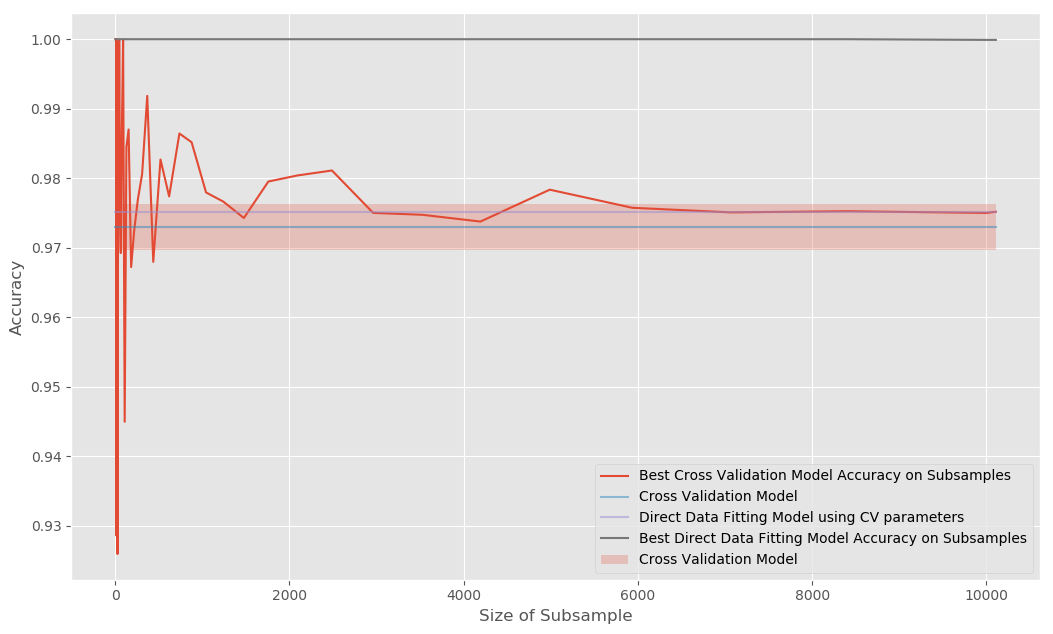

In [140]:
plt.figure(1, figsize=(12.5, 7.5), dpi=100)
plt.plot(nxsubaxis,nsubinteracc.T[0], label='Best Cross Validation Model Accuracy on Subsamples')
plt.fill_between(nxsubaxis, 0.97634472, 0.96963837, alpha=0.25, label='Cross Validation Model')
plt.plot([0,nxsubaxis[-1]],[0.97299155,0.97299155], alpha=0.5, label='Cross Validation Model')
plt.plot([0,nxsubaxis[-1]],[0.97506925,0.97506925], alpha=0.5, label='Direct Data Fitting Model using CV parameters')
plt.plot(nxsubaxis,nsubinteracc.T[1],label='Best Direct Data Fitting Model Accuracy on Subsamples')
plt.legend()
plt.xlabel('Size of Subsample')
plt.ylabel('Accuracy')
plt.show()

The thick red line is the accuracy produced by fitting the best cross validation model with the parameters that achieved the highest accuracy from cross validation on larger and larger subsamples. We see that as the sample reaches the original dataset, we reach the same accuracy as overfitting on the training set using the cross-validated parameters. The best parameters from direct data fitting achieves near 100% accuracy from the beginning. In a sense, we approximate the mean of the accuracy, as we take more accurate measurements of the accuracy.

Around 6000 cells, the model accuracy begins to stagnate, and could be a threshold for how many cells one would need in this analysis.

#### (9) What if you can change the numbers of individual cell types that you collect? Is the model you obtain sensitive to the number of cells in each group to the same extent?

Support vector machines perform binary classification, but can classify multiple groups by doing one against all or one against one methods. Furthermore, the SVM doesn't really care about the response of each cell, (cancer or not cancer) rather than the relationship between cells, particulary the ones that will define the support vectors. If the groups of cells are markedly different between each other, then the location of the support vectors may change or might totally be reassigned, which makes the model sensitive to such changes. In this case, the cells studied were cancer cell lines (breast and blood cancer) and white blood cells. These cells should be different in a number of variables, but the svm was able to recognize the main cancerous, not cancerous discrimination.

#### (10) Your collaborator collects completely new data and brings it to you for classification. You take your chosen optimal model from (7) and classify each cell. Would you expect your model to perform better, identically, or slightly worse than before? Why?

The model cannot perform identically, unless it uses the same support vectors that defined the margin when trained and tested on the previous dataset. It is the movement of the support vectors, or new vectors being assigned as support vectors, that differentiate the model's performance. In the end, all the model is, is the margin, much like how the trained linear regression model is a line. The model should perform only slightly worse, since the data come from the same distribution of cancer cells, but are now new vectors. Some vectors may be on the other side of the margin, but only slightly so.

#### (11) Assume these measurements are identical to patient data one would obtain for a patient with cancer. Also, as a prior distribution, assume that, among patients coming in for testing, 99% are cancer-free in the end. Estimate how many cells would need to be analyzed on average to make a confident diagnosis of cancer.

Hint: You'll need a confidence in your prediction as to whether or not each cell is cancerous.

How does one use priors on ML algorithms in general? Support vector machines don't really seem like probabilistic models, I think.